In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np



In [50]:
df_input = pd.read_csv("student_habits_performance_encoding_input.csv")
df_input.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,gender_Female,gender_Male,gender_Other
0,23,0.0,1.2,1.1,0,85.0,8.0,1,6,3,1,8,1,1,0,0
1,20,6.9,2.8,2.3,0,97.3,4.6,2,6,1,1,8,0,1,0,0
2,21,1.4,3.1,1.3,0,94.8,8.0,0,1,1,0,1,0,0,1,0
3,23,1.0,3.9,1.0,0,71.0,9.2,0,4,3,2,1,1,1,0,0
4,19,5.0,4.4,0.5,0,90.9,4.9,1,3,3,2,1,0,1,0,0


Chuẩn hóa dữ liệu (Standardization)

In [22]:
scaler = StandardScaler()

scaler.fit(df_input)
scale_stu_data = scaler.transform(df_input)

# Kiểm tra trung bình gần 0 và độ lệch chuẩn gần 1
print("Mean của các đặc trưng sau chuẩn hóa:", np.mean(scale_stu_data, axis=0))
print("Std của các đặc trưng sau chuẩn hóa:", np.std(scale_stu_data, axis=0))

Mean của các đặc trưng sau chuẩn hóa: [-4.99156272e-16 -3.30402372e-16 -4.97379915e-17 -9.94759830e-17
 -3.90798505e-17  5.29354338e-16 -3.44613227e-16 -1.13686838e-16
  4.79616347e-17  5.15143483e-17  1.46549439e-16  1.03028697e-16
 -3.55271368e-17 -2.84217094e-17  6.39488462e-17  0.00000000e+00]
Std của các đặc trưng sau chuẩn hóa: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Code thử theo công thức pca

In [21]:


# Step 1: Standardize the data (subtract mean, divide by std)
X = df_input.values
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_standardized.T)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvectors by decreasing eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Project data onto new space using top k eigenvectors (e.g., k=2)
k = 2
projection_matrix = sorted_eigenvectors[:, :k]
X_pca_manual = X_standardized.dot(projection_matrix)

# Show result: first 5 rows of projected data and eigenvalues
X_pca_manual[:5], sorted_eigenvalues[:k]


(array([[-1.12816062,  0.05117674],
        [-1.33316859,  0.65062888],
        [ 1.36150018, -1.52471022],
        [-1.38799772, -0.81051935],
        [-1.5976438 ,  0.94198716]]),
 array([1.94601359, 1.16817297]))

PCA

Select the principal components

In [33]:

# Initialize PCA
pca = PCA()

# Apply PCA
X_pca = pca.fit_transform(scale_stu_data)

# Get explained variance ratio and cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find the number of components needed to retain at least 90% variance
num_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

# Print results
print("Explained variance ratio of each principal component:", explained_variance)
print("Cumulative explained variance:", cumulative_variance)
print(f"Number of components needed to retain ≥ 90% variance: {num_components_90}")


Explained variance ratio of each principal component: [0.12150422 0.0729378  0.0720149  0.06962731 0.0676358  0.06477031
 0.06347988 0.06311848 0.06159344 0.06039281 0.06010155 0.05740331
 0.05661103 0.05537737 0.05343179 0.        ]
Cumulative explained variance: [0.12150422 0.19444202 0.26645692 0.33608424 0.40372004 0.46849035
 0.53197022 0.59508871 0.65668214 0.71707495 0.7771765  0.83457981
 0.89119084 0.94656821 1.         1.        ]
Number of components needed to retain ≥ 90% variance: 14


In [28]:
# Display each principal component with variance ratio in the required format
pca_variance_report = [
    f"PC{i+1}: {var:.4}" for i, var in enumerate(explained_variance)
]

# Maximum display limit of 16 elements (depending on number of input dimensions)
pca_variance_report

['PC1: 0.1215',
 'PC2: 0.07294',
 'PC3: 0.07201',
 'PC4: 0.06963',
 'PC5: 0.06764',
 'PC6: 0.06477',
 'PC7: 0.06348',
 'PC8: 0.06312',
 'PC9: 0.06159',
 'PC10: 0.06039',
 'PC11: 0.0601',
 'PC12: 0.0574',
 'PC13: 0.05661',
 'PC14: 0.05538',
 'PC15: 0.05343',
 'PC16: 0.0']

SCREE PLOT

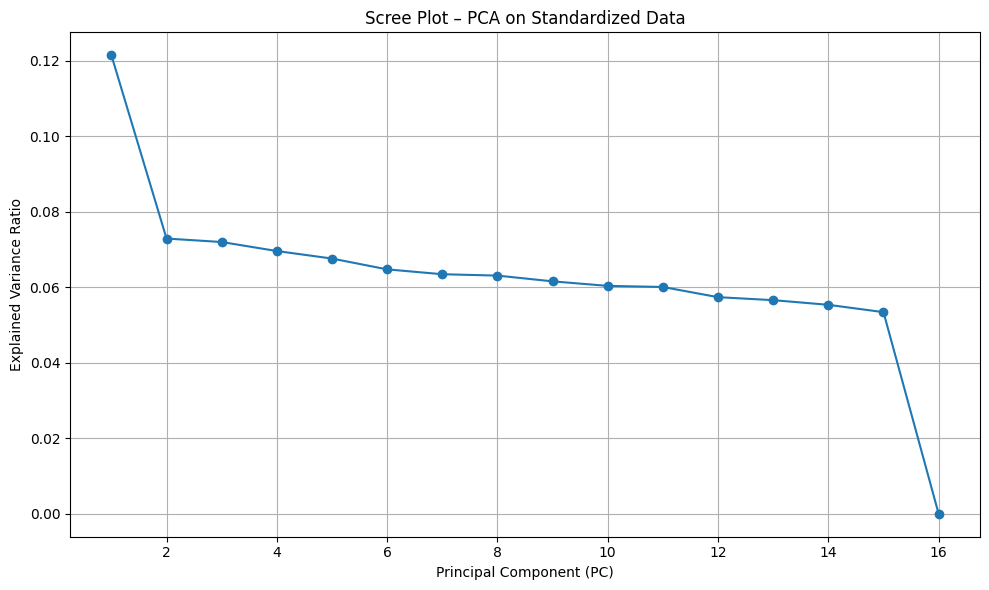

In [ ]:
# Plot Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel("Principal Component (PC)")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot – PCA on Standardized Data")
plt.grid(True)
plt.tight_layout()

plt.savefig('Scree_Plot_Dt1', dpi=300)

plt.show()

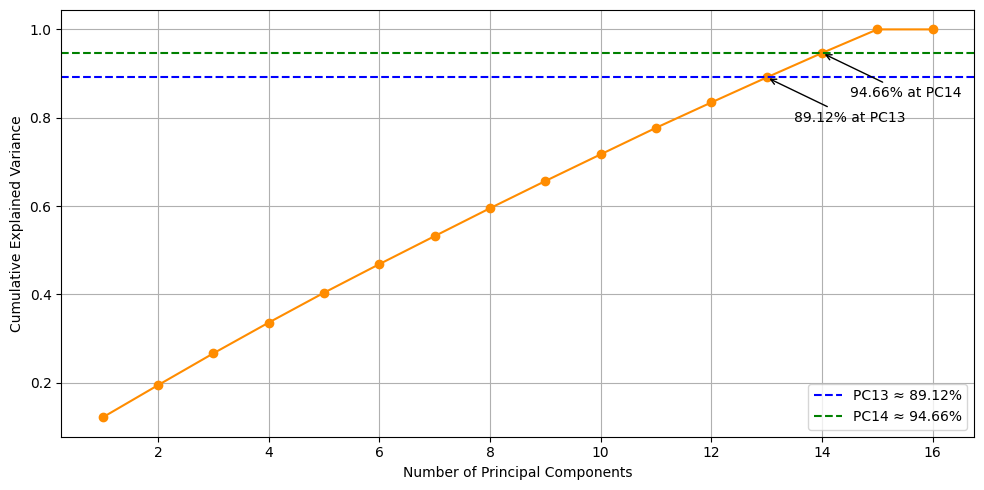

In [41]:
# Get cumulative variance values at PC13 and PC14
var_pc13 = cumulative_variance[12]  # PC13 (index 12)
var_pc14 = cumulative_variance[13]  # PC14 (index 13)

# Plot cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='darkorange')

plt.axhline(y=var_pc13, color='blue', linestyle='--', label=f'PC13 ≈ {var_pc13:.2%}')
plt.axhline(y=var_pc14, color='green', linestyle='--', label=f'PC14 ≈ {var_pc14:.2%}')

# Annotate PC13 and PC14
plt.annotate(f'{var_pc13:.2%} at PC13', 
             xy=(13, var_pc13), 
             xytext=(13.5, var_pc13 - 0.1),
             arrowprops=dict(facecolor='blue', arrowstyle='->'))

plt.annotate(f'{var_pc14:.2%} at PC14', 
             xy=(14, var_pc14), 
             xytext=(14.5, var_pc14 - 0.1),
             arrowprops=dict(facecolor='green', arrowstyle='->'))

# Final formatting

plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
# Create annotion
plt.legend() 

plt.grid(True)
plt.tight_layout()

plt.savefig('Cumulative_Explained_Variance_Dt1', dpi=300)

plt.show()

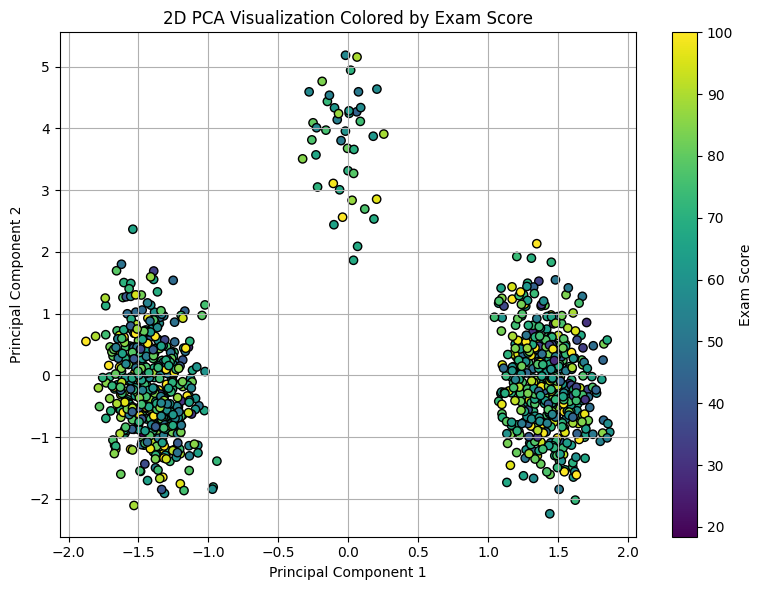

In [47]:
# Reduce to 2 dimensions using PCA

# Lấy dữ liệu điểm thi từ DataFrame
df_encoded = pd.read_csv("student_habits_performance_encoding.csv")
exam_scores = df_encoded['exam_score']

# Step 1: Apply PCA to reduce to 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(scale_stu_data)

# Step 2: Plot with color representing exam_score
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                      c=exam_scores,           # Color mapped by exam score
                      cmap='viridis',          # Color map from low to high
                      edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization Colored by Exam Score")
plt.colorbar(scatter, label="Exam Score")  # Show color legend
plt.grid(True)
plt.tight_layout()

plt.savefig('2D_PCA_Dt1', dpi=300)

plt.show()